<a href="https://colab.research.google.com/github/andrecm0/RNA-Power-Flow/blob/main/TG_Andr%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curva de Carga

In [ ]:
!pip install pandapower


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.4/5.4 MB 80.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 91.1/91.1 kB 10.5 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Curva_de_Carga_Sudeste_2023.csv to Curva_de_Carga_Sudeste_2023.csv


In [ ]:
import pandas as pd

curva = pd.read_csv("Curva_de_Carga_Sudeste_2023.csv", parse_dates=['din_instante'])
curva.head()


Unnamed: 0        din_instante  hora  dia_semana  mes   carga_mw
0           3 2023-01-01 00:00:00     0           6    1  32183.885
1           7 2023-01-01 01:00:00     1           6    1  32196.682
2          11 2023-01-01 02:00:00     2           6    1  31539.570
3          15 2023-01-01 03:00:00     3           6    1  30699.367
4          19 2023-01-01 04:00:00     4           6    1  30126.195

In [ ]:
curva['fator_carga'] = curva['carga_mw'] / curva['carga_mw'].max()


# IEEE 14 Barras

In [ ]:
import pandapower.networks as pn
import pandapower as pp

# Carrega o sistema IEEE 14 barras
net = pn.case14()

pp.runpp(net)

# Tens√µes nas barras
display(net.res_bus[['vm_pu', 'va_degree']])




vm_pu  va_degree
0   1.060000   0.000000
1   1.045000  -4.982589
2   1.010000 -12.725100
3   1.017671 -10.312901
4   1.019514  -8.773854
5   1.070000 -14.220946
6   1.061520 -13.359627
7   1.090000 -13.359627
8   1.055932 -14.938521
9   1.050985 -15.097288
10  1.056907 -14.790622
11  1.055189 -15.075585
12  1.050382 -15.156276
13  1.035530 -16.033645

In [ ]:
import pandapower.networks as pn
net = pn.case14()


fator = 1.3  # 30% a mais
net.load['p_mw'] *= fator
net.load['q_mvar'] *= fator
net.gen['p_mw'] *= fator

display(net.gen)
display(net.load)

# Executa o fluxo de pot√™ncia
pp.runpp(net)

# Tens√µes por barra
display(net.res_bus[["vm_pu", "va_degree"]])

name  bus  p_mw  vm_pu  sn_mva  min_q_mvar  max_q_mvar  scaling  slack  \
0  None    1  52.0  1.045     NaN       -40.0        50.0      1.0  False   
1  None    2   0.0  1.010     NaN         0.0        40.0      1.0  False   
2  None    5   0.0  1.070     NaN        -6.0        24.0      1.0  False   
3  None    7   0.0  1.090     NaN        -6.0        24.0      1.0  False   

   in_service  slack_weight  type  controllable  max_p_mw  min_p_mw  
0        True           0.0  None          True     140.0       0.0  
1        True           0.0  None          True     100.0       0.0  
2        True           0.0  None          True     100.0       0.0  
3        True           0.0  None          True     100.0       0.0

name  bus    p_mw  q_mvar  const_z_percent  const_i_percent  sn_mva  \
0   None    1   28.21   16.51              0.0              0.0     NaN   
1   None    2  122.46   24.70              0.0              0.0     NaN   
2   None    3   62.14   -5.07              0.0              0.0     NaN   
3   None    4    9.88    2.08              0.0              0.0     NaN   
4   None    5   14.56    9.75              0.0              0.0     NaN   
5   None    8   38.35   21.58              0.0              0.0     NaN   
6   None    9   11.70    7.54              0.0              0.0     NaN   
7   None   10    4.55    2.34              0.0              0.0     NaN   
8   None   11    7.93    2.08              0.0              0.0     NaN   
9   None   12   17.55    7.54              0.0              0.0     NaN   
10  None   13   19.37    6.50              0.0              0.0     NaN   

    scaling  in_service  type  controllable  
0       1.0        True  None         False  
1       1.0        True  None         False  
2       1.0        True  None         False  
3       1.0        True  None         False  
4       1.0        True  None         False  
5       1.0        True  None         False  
6       1.0        True  None         False  
7       1.0        True  None         False  
8       1.0        True  None         False  
9       1.0        True  None         False  
10      1.0        True  None         False

vm_pu  va_degree
0   1.060000   0.000000
1   1.045000  -6.691373
2   1.010000 -17.055753
3   1.008376 -13.693516
4   1.010743 -11.677857
5   1.070000 -18.947360
6   1.052193 -17.686414
7   1.090000 -17.686414
8   1.041700 -19.764241
9   1.036903 -19.993325
10  1.048660 -19.634668
11  1.049812 -20.063931
12  1.042767 -20.152810
13  1.018320 -21.268769

# Integrando a Curva de Carga

In [ ]:
import copy
import time
import pandas as pd
import pandapower as pp
import pandapower.networks as pn

# Carregando sistema base
base_net = pn.case14()

# Gerar cen√°rios e medir tempo
cenarios = []
#fatores_carga = [0.8, 0.9, 1.0, 1.1, 1.2]  # Fatores de carga

start_solver = time.time()  # in√≠cio da contagem de tempo

# Gerar cen√°rios

for i, row in curva.iterrows():
    net = copy.deepcopy(base_net)

    fator = row['fator_carga']
    net.load['p_mw'] *= fator
    net.load['q_mvar'] *= fator

    pp.runpp(net)

    entrada = {
        **{f'load_p_mw_{i}': p for i, p in enumerate(net.load['p_mw'])},
        **{f'load_q_mvar_{i}': q for i, q in enumerate(net.load['q_mvar'])},
        **{f'gen_vm_pu_{i}': v for i, v in enumerate(net.gen['vm_pu'])},
        'hora': row['hora'],
        'dia_semana': row['dia_semana'],
        'mes': row['mes']
    }

    saida = {
        **{f'bus_vm_pu_{i}': v for i, v in enumerate(net.res_bus['vm_pu'])},
    }

    cenario = {**entrada, **saida}
    cenarios.append(cenario)
solver_total_time = time.time() - start_solver  # fim da contagem
print(f"Tempo total solver para {len(curva)} casos: {solver_total_time:.2f} segundos")

# Criar DataFrame e salvar
cenarios_df = pd.DataFrame(cenarios)
cenarios_df.to_csv('cenarios_ieee14_completos_com_fatores.csv', index=False)
print("Cen√°rios com fatores de carga salvos com sucesso!")


Tempo total solver para 8760 casos: 392.17 segundos
Cen√°rios com fatores de carga salvos com sucesso!


# Pr√©-Processamento

In [ ]:
# O StandardScaler √© uma ferramenta da biblioteca scikit-learn usada para padronizar dados. Ele transforma as vari√°veis para que tenham:
# m√©dia (mean) = 0
# desvio padr√£o (std) = 1

from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib

# 1. Carregar os dados
df = pd.read_csv('cenarios_ieee14_completos_com_fatores.csv')

# 2. Separar entradas e sa√≠das
colunas_entrada = [col for col in df.columns if (
    col.startswith('load_p_mw_') or
    col.startswith('load_q_mvar_') or
    col.startswith('gen_vm_pu_') or
    col in ['hora', 'dia_da_semana', 'mes']
)]

colunas_saida = [col for col in df.columns if
    col.startswith('bus_vm_pu_') ]

X = df[colunas_entrada].values
y = df[colunas_saida].values

# 3. Normalizar entradas (StandardScaler √© recomendado para RNA com ReLU ou Linear)
scaler_X = StandardScaler()
X_normalizado = scaler_X.fit_transform(X)

# 4. Salvar os arrays e o scaler
np.save('X_normalizado.npy', X_normalizado)
np.save('y_saida.npy', y)
joblib.dump(scaler_X, 'scaler_X.pkl')

print("Pr√©-processamento conclu√≠do com sucesso. Dados prontos para treinar a RNA.")


Pr√©-processamento conclu√≠do com sucesso. Dados prontos para treinar a RNA.


# Grid Search (Hiperpar√¢metros)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import joblib
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import itertools
import pandas as pd
from tensorflow.keras import Input

# -------------------------------
# 1) Carregar dados
# -------------------------------
X = np.load('X_normalizado.npy')
y = np.load('y_saida.npy')

# Garantir que y seja 2D: (n amostras, n_saidas)
if y.ndim == 1:
    y = y.reshape(-1, 1)

# -------------------------------
# 2) Normalizar y e salvar scaler
# -------------------------------
scaler_y = StandardScaler()
y_normalizado = scaler_y.fit_transform(y)
joblib.dump(scaler_y, 'scaler_y.pkl')
print("Scaler de y salvo como 'scaler_y.pkl'.")

# -------------------------------
# 3) Split
# -------------------------------
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_normalizado, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.1765, random_state=42
)

# (opcional) salvar conjuntos
np.save('X_train.npy', X_train)
np.save('X_val.npy',   X_val)
np.save('X_test.npy',  X_test)
np.save('y_train.npy', y_train)
np.save('y_val.npy',   y_val)
np.save('y_test.npy',  y_test)
print("Conjuntos de dados salvos com sucesso.")

# --------------------------------------------------
# ‚Üí Fun√ß√£o para criar modelo
# --------------------------------------------------
def criar_modelo(n_neuronios, camadas, ativacao, input_dim, output_dim, dropout=0.0):
    modelo = Sequential()
    modelo.add(Input(shape=(input_dim,)))
    for _ in range(camadas):
        modelo.add(Dense(n_neuronios, activation=ativacao))
        if dropout > 0:
            modelo.add(Dropout(dropout))
    modelo.add(Dense(output_dim, activation='linear'))
    modelo.compile(optimizer='adam', loss='mae', metrics=['mae'])
    return modelo

# --------------------------------------------------
# ‚Üí GRID SEARCH (treino com MAE; m√©tricas extras)
# --------------------------------------------------
ativacoes  = ['linear', 'relu', 'tanh', 'sigmoid']
neurons    = [8, 16, 32, 64, 128, 256, 512]
num_layers = [1, 2, 3, 4, 5]

resultados = []
best_mae_real = np.inf
best_model = None
scaler_y = joblib.load('scaler_y.pkl')

for ativacao, n_neuronios, camadas in itertools.product(ativacoes, neurons, num_layers):
    print(f"\nüîß Testando: ativa√ß√£o={ativacao}, neur√¥nios={n_neuronios}, camadas={camadas}")

    modelo = criar_modelo(n_neuronios, camadas, ativacao, X_train.shape[1], y_train.shape[1], dropout=0.0)

    es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

    modelo.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=200,
        batch_size=32,
        callbacks=[es],
        verbose=0
    )

    # Avalia√ß√£o em escala normalizada
    _, mae_norm = modelo.evaluate(X_test, y_test, verbose=0)

    # Predi√ß√£o e m√©tricas em ESCALA REAL (desnormalizada)
    y_pred_norm = modelo.predict(X_test, verbose=0)
    y_pred_real = scaler_y.inverse_transform(y_pred_norm)
    y_test_real = scaler_y.inverse_transform(y_test)

    mae_real = mean_absolute_error(y_test_real, y_pred_real)
    rmse_real = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
    r2 = r2_score(y_test_real, y_pred_real, multioutput='uniform_average')

    print(f"MAE (norm): {mae_norm:.6f} | MAE (real): {mae_real:.6f} | RMSE (real): {rmse_real:.6f}")

    resultados.append({
        'ativacao': ativacao,
        'neur√¥nios': n_neuronios,
        'camadas': camadas,
        'mae_normalizado': mae_norm,
        'mae_real': mae_real,
        'rmse_real': rmse_real,
    })



# DataFrame e ordena√ß√£o
df = pd.DataFrame(resultados)

# Ordenar por MAE real, depois RMSE, depois R¬≤ (em ordem decrescente no R¬≤)
df = df.sort_values(by=['mae_real', 'rmse_real'], ascending=[True, True])

print("\nüìä Top 10 modelos (por MAE real, desempate por RMSE e R¬≤):")
print(df.head(10))

# Salvar resultados e modelo
df.to_csv('resultados_comparativos.csv', index=False)
print("Resultados salvos em 'resultados_comparativos.csv'.")

if best_model is not None:
    best_model.save('melhor_modelo.h5')
    print(f"Melhor modelo salvo como 'melhor_modelo.h5' (MAE real = {best_mae_real:.6f}).")


Scaler de y salvo como 'scaler_y.pkl'.
Conjuntos de dados salvos com sucesso.

üîß Testando: ativa√ß√£o=linear, neur√¥nios=8, camadas=1
MAE (norm): 0.008265 | MAE (real): 0.000520 | RMSE (real): 0.001458

üîß Testando: ativa√ß√£o=linear, neur√¥nios=8, camadas=2
MAE (norm): 0.008144 | MAE (real): 0.000449 | RMSE (real): 0.001093

üîß Testando: ativa√ß√£o=linear, neur√¥nios=8, camadas=3
MAE (norm): 0.008233 | MAE (real): 0.000393 | RMSE (real): 0.000913

üîß Testando: ativa√ß√£o=linear, neur√¥nios=8, camadas=4
MAE (norm): 0.008709 | MAE (real): 0.000728 | RMSE (real): 0.001559

üîß Testando: ativa√ß√£o=linear, neur√¥nios=8, camadas=5
MAE (norm): 0.008589 | MAE (real): 0.000700 | RMSE (real): 0.001458

üîß Testando: ativa√ß√£o=linear, neur√¥nios=16, camadas=1
MAE (norm): 0.008276 | MAE (real): 0.000471 | RMSE (real): 0.000972

üîß Testando: ativa√ß√£o=linear, neur√¥nios=16, camadas=2
MAE (norm): 0.008554 | MAE (real): 0.000788 | RMSE (real): 0.002074

üîß Testando: ativa√ß√£o=line

# Analisando o Grid Search

/tmp/ipython-input-807170453.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ativacao', y='mae_real', palette='Set2')


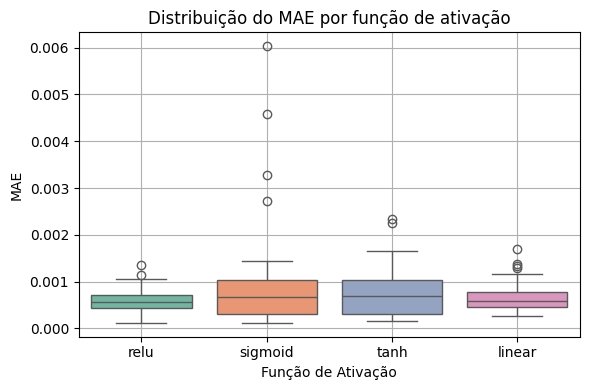

/tmp/ipython-input-807170453.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_relu.sort_values('neur√¥nios'), x='neur√¥nios', y='mae_real', marker='o', ci=None)


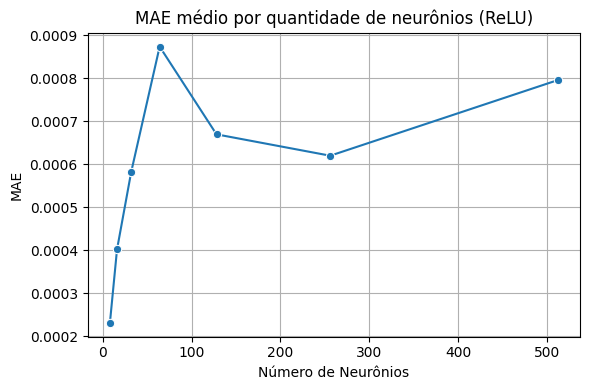

/tmp/ipython-input-807170453.py:33: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_relu.sort_values('camadas'), x='camadas', y='mae_real', marker='s', ci=None)


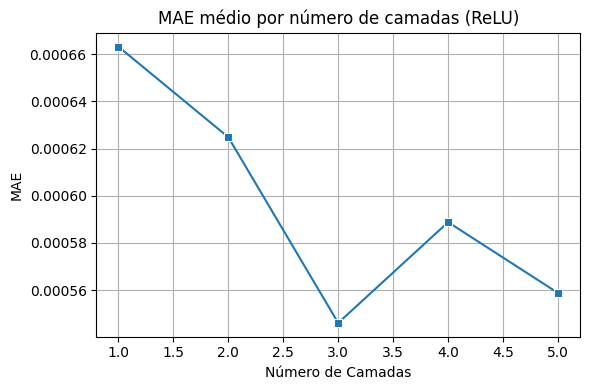

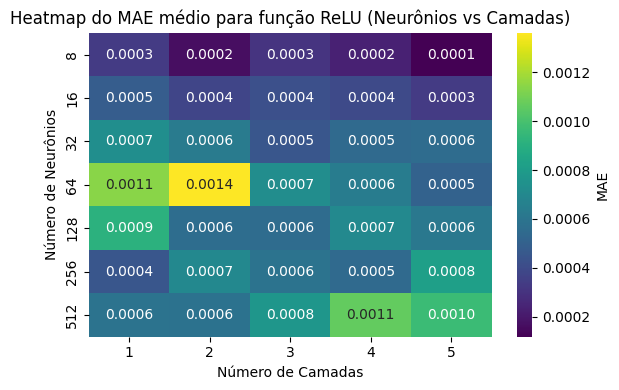

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar resultados
df = pd.read_csv('resultados_comparativos.csv')

# Gr√°fico 1: Boxplot com todas as fun√ß√µes de ativa√ß√£o
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='ativacao', y='mae_real', palette='Set2')
plt.title('Distribui√ß√£o do MAE por fun√ß√£o de ativa√ß√£o')
plt.xlabel('Fun√ß√£o de Ativa√ß√£o')
plt.ylabel('MAE')
plt.grid(True)
plt.tight_layout()
plt.show()

# Filtrar apenas para fun√ß√£o ReLU
df_relu = df[df['ativacao'] == 'relu']

# Gr√°fico 2: MAE m√©dio por quantidade de neur√¥nios (somente ReLU)
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_relu.sort_values('neur√¥nios'), x='neur√¥nios', y='mae_real', marker='o', ci=None)
plt.title('MAE m√©dio por quantidade de neur√¥nios (ReLU)')
plt.xlabel('N√∫mero de Neur√¥nios')
plt.ylabel('MAE')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gr√°fico 3: MAE m√©dio por n√∫mero de camadas (somente ReLU)
plt.figure(figsize=(6, 4))
sns.lineplot(data=df_relu.sort_values('camadas'), x='camadas', y='mae_real', marker='s', ci=None)
plt.title('MAE m√©dio por n√∫mero de camadas (ReLU)')
plt.xlabel('N√∫mero de Camadas')
plt.ylabel('MAE')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gr√°fico 4: Heatmap (somente ReLU)
pivot_relu = df_relu.pivot_table(index='neur√¥nios', columns='camadas', values='mae_real', aggfunc='mean')

plt.figure(figsize=(6, 4))
sns.heatmap(pivot_relu, annot=True, fmt=".4f", cmap='viridis', cbar_kws={'label': 'MAE'})
plt.title('Heatmap do MAE m√©dio para fun√ß√£o ReLU (Neur√¥nios vs Camadas)')
plt.xlabel('N√∫mero de Camadas')
plt.ylabel('N√∫mero de Neur√¥nios')
plt.tight_layout()
plt.show()


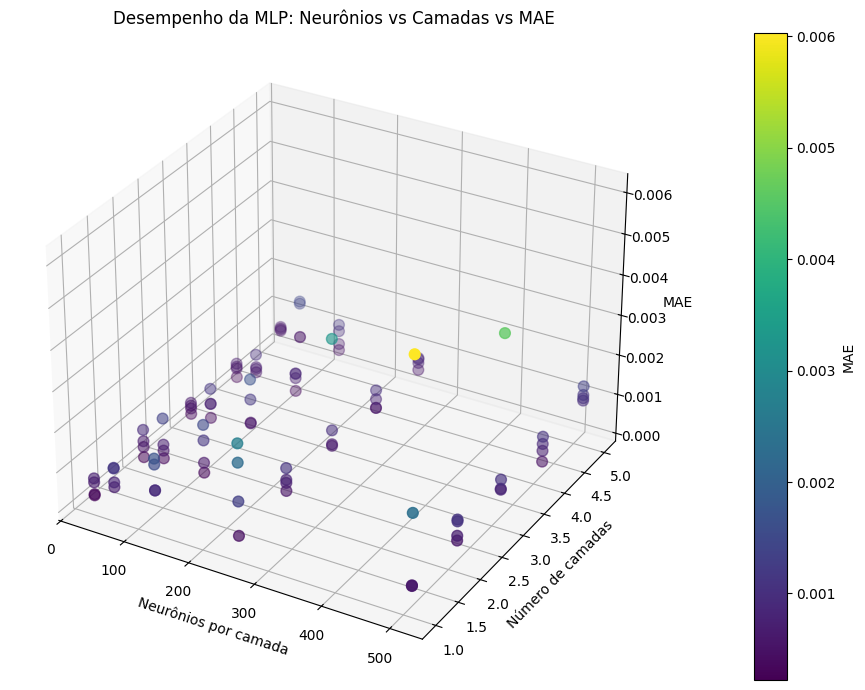

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Carrega os resultados
df = pd.read_csv('resultados_comparativos.csv')

# Filtra os dados para incluir apenas os valores desejados
df_filtrado = df[
    (df['camadas'].isin([1, 2, 3, 4, 5])) &
    (df['neur√¥nios'].isin([32, 64, 128, 256, 512]))
]

# Prepara os dados
x = df_filtrado['neur√¥nios']
y = df_filtrado['camadas']
z = df_filtrado['mae_real']

# Cria a figura 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plota os pontos
scatter = ax.scatter(x, y, z, c=z, cmap='viridis', s=60)

# Eixos
ax.set_xlabel('Neur√¥nios por camada')
ax.set_ylabel('N√∫mero de camadas')
ax.set_zlabel('MAE')

# Barra de cores
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('MAE')

# T√≠tulo
plt.title('Desempenho da MLP: Neur√¥nios vs Camadas vs MAE')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Carregar os dados
df = pd.read_csv('resultados_comparativos.csv')

# Filtrar apenas os dados com fun√ß√£o de ativa√ß√£o ReLU
df_relu = df[df['ativacao'] == 'relu']

# Gr√°fico 3D interativo com Plotly
fig = px.scatter_3d(
    df_relu,
    x='neur√¥nios',
    y='camadas',
    z='mae_real',
    color='mae_real',
    color_continuous_scale='viridis',
    title='Desempenho da MLP com ReLU: Neur√¥nios vs Camadas vs MAE',
    labels={'neur√¥nios': 'Neur√¥nios por camada', 'camadas': 'N√∫mero de camadas', 'mae_real': 'MAE'},
    size_max=10
)

# Layout
fig.update_traces(marker=dict(size=6))
fig.update_layout(scene=dict(
    xaxis_title='Neur√¥nios por camada',
    yaxis_title='N√∫mero de camadas',
    zaxis_title='MAE'
))
fig.show()


# Random Forest

üéØ Treinando modelo vencedor...
‚úÖ Treinamento conclu√≠do.
274/274 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step

‚è±Ô∏è Tempo total da RNA para 8760 entradas: 1.3081 segundos

üìä Compara√ß√£o de desempenho:
- Solver tradicional: 392.17 segundos
- Rede neural (infer√™ncia): 1.31 segundos
- A RNA foi aproximadamente 299.80 vezes mais r√°pida

üå≤ Analisando import√¢ncia das entradas com Random Forest...

üîé Top 10 vari√°veis mais importantes na precis√£o da RNA:
          Variavel  Importancia
13   load_q_mvar_2     0.421703
1      load_p_mw_1     0.042581
12   load_q_mvar_1     0.042142
19   load_q_mvar_8     0.035396
21  load_q_mvar_10     0.034402
15   load_q_mvar_4     0.033930
20   load_q_mvar_9     0.033136
6      load_p_mw_6     0.032385
17   load_q_mvar_6     0.030677
9      load_p_mw_9     0.030197


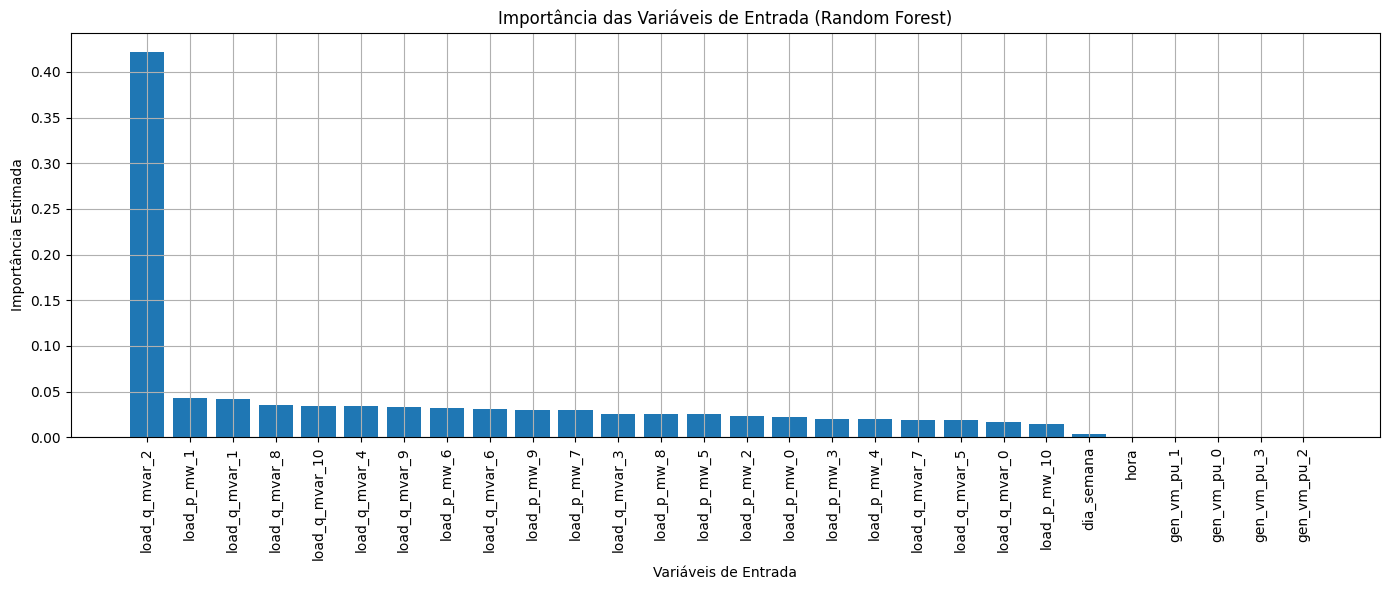


üíæ Arquivo 'importancia_variaveis.csv' salvo com sucesso.


In [ ]:
import numpy as np
import time
import joblib
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# ----------------------------
# PARTE 1: Preparar dados
# ----------------------------

X = np.load('X_normalizado.npy')
y = np.load('y_saida.npy')
scaler_y = joblib.load('scaler_y.pkl')
y_normalizado = scaler_y.transform(y)

# Carregar nomes das colunas de entrada a partir do CSV original
df = pd.read_csv('cenarios_ieee14_completos_com_fatores.csv')

# Tentativa de capturar colunas num√©ricas que comp√µem X
colunas_entrada = df.select_dtypes(include=[np.number]).columns.tolist()

# Ajustar para bater exatamente com X
if len(colunas_entrada) >= X.shape[1]:
    colunas_entrada = colunas_entrada[:X.shape[1]]
else:
    print(f"‚ö†Ô∏è Apenas {len(colunas_entrada)} nomes encontrados para {X.shape[1]} colunas em X.")
    colunas_entrada = [f'Var_{i}' for i in range(X.shape[1])]
    print("üîÅ Usando nomes gen√©ricos temporariamente.")

# ----------------------------
# PARTE 2: Treinar modelo RNA
# ----------------------------

modelo = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(y.shape[1], activation='linear')
])

modelo.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("üéØ Treinando modelo vencedor...")
modelo.fit(X, y_normalizado, epochs=100, batch_size=32, verbose=0)
print("‚úÖ Treinamento conclu√≠do.")

# ----------------------------
# PARTE 3: Infer√™ncia RNA
# ----------------------------

start_time = time.time()
y_pred_normalizado = modelo.predict(X)
nn_total_time = time.time() - start_time

y_pred = scaler_y.inverse_transform(y_pred_normalizado)

print(f"\n‚è±Ô∏è Tempo total da RNA para {X.shape[0]} entradas: {nn_total_time:.4f} segundos")

# ----------------------------
# PARTE 4: Comparar tempo com solver
# ----------------------------

solver_total_time = 392.17  # substitua com o valor real medido

print(f"\nüìä Compara√ß√£o de desempenho:")
print(f"- Solver tradicional: {solver_total_time:.2f} segundos")
print(f"- Rede neural (infer√™ncia): {nn_total_time:.2f} segundos")
print(f"- A RNA foi aproximadamente {solver_total_time / nn_total_time:.2f} vezes mais r√°pida")

# ----------------------------
# PARTE 5: Random Forest para import√¢ncia das vari√°veis
# ----------------------------

print("\nüå≤ Analisando import√¢ncia das entradas com Random Forest...")

# Calcular erro absoluto da RNA por amostra
erro_abs = np.abs(y - y_pred)
erro_medio = erro_abs.mean(axis=1) if erro_abs.ndim > 1 else erro_abs

# Treinar Random Forest para prever erro da RNA com base nas entradas
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, erro_medio)

# Import√¢ncias com nomes reais
importancias = rf.feature_importances_
df_importancia = pd.DataFrame({
    'Variavel': colunas_entrada,
    'Importancia': importancias
}).sort_values(by='Importancia', ascending=False)

# Exibir top 10
print("\nüîé Top 10 vari√°veis mais importantes na precis√£o da RNA:")
print(df_importancia.head(10))

# Plot
plt.figure(figsize=(14, 6))
plt.bar(df_importancia['Variavel'], df_importancia['Importancia'])
plt.xticks(rotation=90)
plt.xlabel('Vari√°veis de Entrada')
plt.ylabel('Import√¢ncia Estimada')
plt.title('Import√¢ncia das Vari√°veis de Entrada (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Salvar CSV
df_importancia.to_csv('importancia_variaveis.csv', index=False)
print("\nüíæ Arquivo 'importancia_variaveis.csv' salvo com sucesso.")


In [ ]:
print(f"X.shape[1] = {X.shape[1]} (n√∫mero de colunas na matriz de entrada)")
print(f"len(colunas_entrada) = {len(colunas_entrada)} (n√∫mero de nomes das colunas)")


X.shape[1] = 28 (n√∫mero de colunas na matriz de entrada)
len(colunas_entrada) = 24 (n√∫mero de nomes das colunas)


# Avalia√ß√£o

Scaler de y salvo como 'scaler_y.pkl'.
55/55 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 6ms/step


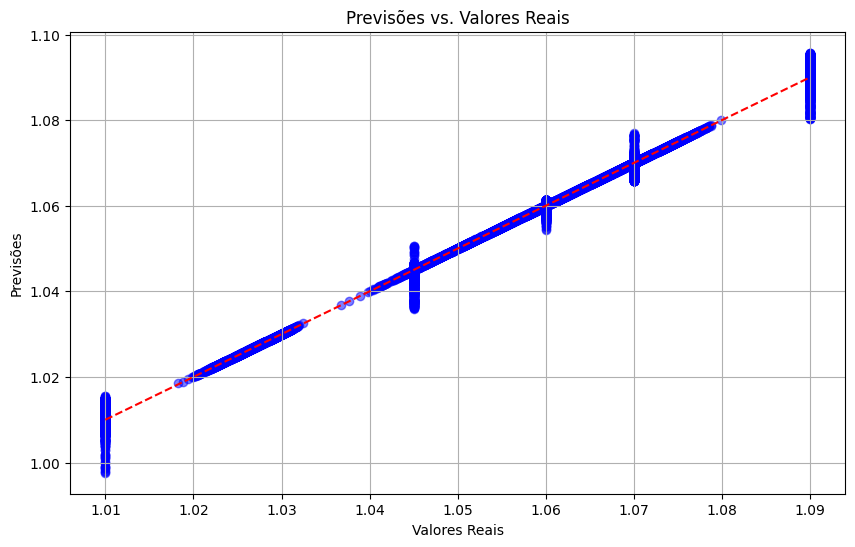

In [ ]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Carregar dados
X = np.load('X_normalizado.npy')
y = np.load('y_saida.npy')

# 2. Normalizar y
scaler_y = StandardScaler()
y_normalizado = scaler_y.fit_transform(y)

# 3. Salvar o scaler para uso posterior
joblib.dump(scaler_y, 'scaler_y.pkl')
print("Scaler de y salvo como 'scaler_y.pkl'.")

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_normalizado, test_size=0.2, random_state=42)

# Modelo
modelo = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(8, activation='relu'),
    Dense(8, activation='relu'),
    Dense(y.shape[1], activation='linear')
])
modelo.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelo.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

# Infer√™ncia
y_pred_normalizado = modelo.predict(X_test)
y_previsto_original = scaler_y.inverse_transform(y_pred_normalizado)
y_test_original = scaler_y.inverse_transform(y_test)

# Gr√°fico: Previs√µes vs Valores Reais
plt.figure(figsize=(10,6))
plt.scatter(y_test_original, y_previsto_original, color='blue', alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linestyle='--')
plt.title('Previs√µes vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previs√µes')
plt.grid(True)
plt.show()


Scaler de y salvo como 'scaler_y.pkl'.
55/55 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step


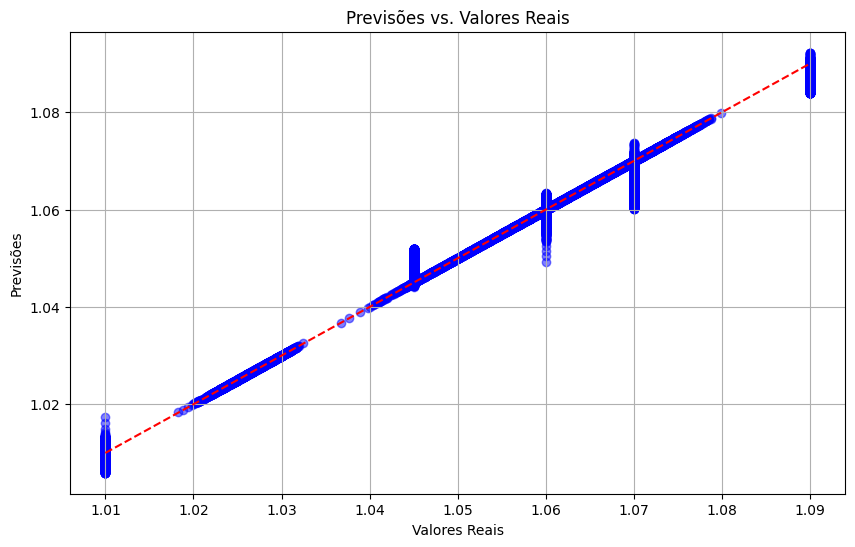

In [ ]:
import numpy as np
import joblib
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Carregar dados
X = np.load('X_normalizado.npy')
y = np.load('y_saida.npy')

# 2. Normalizar y
scaler_y = StandardScaler()
y_normalizado = scaler_y.fit_transform(y)

# 3. Salvar o scaler para uso posterior
joblib.dump(scaler_y, 'scaler_y.pkl')
print("Scaler de y salvo como 'scaler_y.pkl'.")

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_normalizado, test_size=0.2, random_state=42)

# Modelo
modelo = Sequential([
    Input(shape=(X.shape[1],)),
    Dense(256, activation='relu'),
    Dense(256), activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(y.shape[1], activation='linear')
])
modelo.compile(optimizer='adam', loss='mse', metrics=['mae'])
modelo.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

# Infer√™ncia
y_pred_normalizado = modelo.predict(X_test)
y_previsto_original = scaler_y.inverse_transform(y_pred_normalizado)
y_test_original = scaler_y.inverse_transform(y_test)

# Gr√°fico: Previs√µes vs Valores Reais
plt.figure(figsize=(10,6))
plt.scatter(y_test_original, y_previsto_original, color='blue', alpha=0.5)
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         color='red', linestyle='--')
plt.title('Previs√µes vs. Valores Reais')
plt.xlabel('Valores Reais')
plt.ylabel('Previs√µes')
plt.grid(True)
plt.show()


# K- Fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ----------------------------
# PARTE 6: K-Fold Cross Validation
# ----------------------------

print("\nüîÅ Iniciando valida√ß√£o cruzada (K-Fold)...")

k = 5  # ou outro valor desejado
kf = KFold(n_splits=k, shuffle=True, random_state=42)

maes, rmses, r2s = [], [], []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), 1):
    print(f"\nüì¶ Fold {fold}/{k}")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_normalizado[train_idx], y_normalizado[test_idx]

    # Novo modelo com a mesma arquitetura original
    modelo_fold = Sequential([
        Input(shape=(X.shape[1],)),
        Dense(8, activation='relu'),
        Dense(8, activation='relu'),
        Dense(y.shape[1], activation='linear')
    ])
    modelo_fold.compile(optimizer='adam', loss='mse')

    modelo_fold.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

    # Infer√™ncia
    y_pred_norm = modelo_fold.predict(X_test, verbose=0)

    # Desnormalizar
    y_pred_real = scaler_y.inverse_transform(y_pred_norm)
    y_test_real = scaler_y.inverse_transform(y_test)

    # M√©tricas
    mae = mean_absolute_error(y_test_real, y_pred_real)
    rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))
    r2 = r2_score(y_test_real, y_pred_real)

    print(f"MAE: {mae:.6f} | RMSE: {rmse:.6f} | R¬≤: {r2:.4f}")

    maes.append(mae)
    rmses.append(rmse)
    r2s.append(r2)

# ----------------------------
# Resultado final
# ----------------------------

print("\nüìä Resultados m√©dios ap√≥s K-Fold:")
print(f"MAE  m√©dio: {np.mean(maes):.6f} ¬± {np.std(maes):.6f}")
print(f"RMSE m√©dio: {np.mean(rmses):.6f} ¬± {np.std(rmses):.6f}")
print(f"R¬≤   m√©dio: {np.mean(r2s):.4f} ¬± {np.std(r2s):.4f}")



üîÅ Iniciando valida√ß√£o cruzada (K-Fold)...

üì¶ Fold 1/5
MAE: 0.000486 | RMSE: 0.001059 | R¬≤: -7496551590144025559040.0000

üì¶ Fold 2/5
MAE: 0.000471 | RMSE: 0.001111 | R¬≤: -8347229723733496168448.0000

üì¶ Fold 3/5
MAE: 0.000573 | RMSE: 0.001372 | R¬≤: -13863792355209319022592.0000

üì¶ Fold 4/5
MAE: 0.000427 | RMSE: 0.001094 | R¬≤: -7231304420663088906240.0000

üì¶ Fold 5/5
MAE: 0.000291 | RMSE: 0.000637 | R¬≤: -2991147151330068922368.0000

üìä Resultados m√©dios ap√≥s K-Fold:
MAE  m√©dio: 0.000449 ¬± 0.000092
RMSE m√©dio: 0.001054 ¬± 0.000237
R¬≤   m√©dio: -7986005048215998562304.0000 ¬± 3476682615004872572928.0000


# Generaliza√ß√£o 1.3x


üîå Simulando cen√°rio 1.3x com solver (Pandapower)...
‚ö†Ô∏è Colunas n√£o encontradas: load_p_mw_11, load_q_mvar_11
‚ö†Ô∏è Colunas n√£o encontradas: load_p_mw_12, load_q_mvar_12
‚ö†Ô∏è Colunas n√£o encontradas: load_p_mw_13, load_q_mvar_13
‚ö†Ô∏è Colunas n√£o encontradas: load_p_mw_14, load_q_mvar_14
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 185ms/step


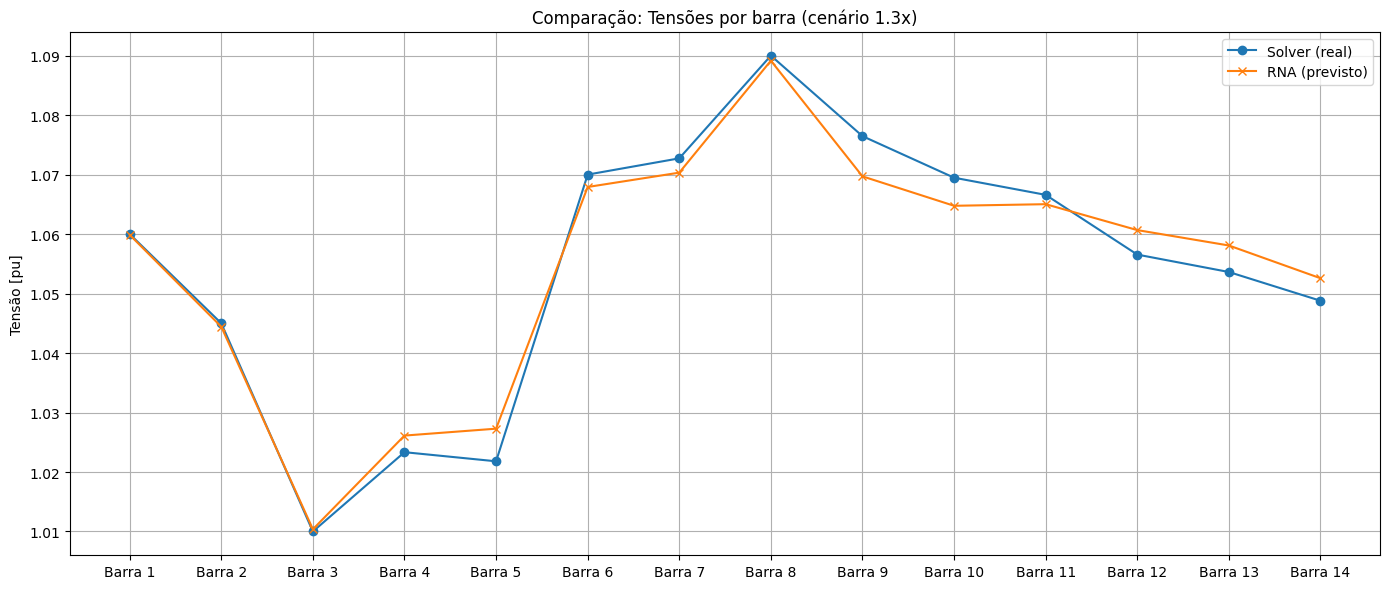


üìä Erro absoluto por barra (RNA vs Solver):
Barra  1: |RNA - Solver| = 0.000134 pu
Barra  2: |RNA - Solver| = 0.000576 pu
Barra  3: |RNA - Solver| = 0.000372 pu
Barra  4: |RNA - Solver| = 0.002793 pu
Barra  5: |RNA - Solver| = 0.005483 pu
Barra  6: |RNA - Solver| = 0.002085 pu
Barra  7: |RNA - Solver| = 0.002404 pu
Barra  8: |RNA - Solver| = 0.000849 pu
Barra  9: |RNA - Solver| = 0.006762 pu
Barra 10: |RNA - Solver| = 0.004723 pu
Barra 11: |RNA - Solver| = 0.001569 pu
Barra 12: |RNA - Solver| = 0.004117 pu
Barra 13: |RNA - Solver| = 0.004459 pu
Barra 14: |RNA - Solver| = 0.003785 pu


In [ ]:
import pandapower.networks as nw
import pandapower as pp

# ----------------------------
# PARTE 8: Simular fluxo de pot√™ncia com solver (1.3x)
# ----------------------------

print("\nüîå Simulando cen√°rio 1.3x com solver (Pandapower)...")

# 1. Carregar sistema IEEE 14 barras
net = nw.case14()

# 2. Carregar um cen√°rio base do seu CSV (primeira linha, por exemplo)
df = pd.read_csv('cenarios_ieee14_completos_com_fatores.csv')
cen_base = df.iloc[0]  # use o √≠ndice correto se desejar outro cen√°rio
# 3. Atualizar cargas do modelo para 1.3x
for i, load in net.load.iterrows():
    barra = load['bus']  # √≠ndice do Pandapower (de 0 a 13)

    # ‚ö†Ô∏è Corrigido para bater com seu CSV que vai de 1 a 14
    p_col = f'load_p_mw_{barra + 1}'
    q_col = f'load_q_mvar_{barra + 1}'

    try:
        p_mw = cen_base[p_col] * 1.3
        q_mvar = cen_base[q_col] * 1.3
        net.load.at[i, 'p_mw'] = p_mw
        net.load.at[i, 'q_mvar'] = q_mvar
    except KeyError:
        print(f"‚ö†Ô∏è Colunas n√£o encontradas: {p_col}, {q_col}")

# 4. Executar o solver
pp.runpp(net)

# 5. Obter tens√µes reais do solver
tensoes_solver = net.res_bus.vm_pu.values

# 6. Obter tens√µes previstas da RNA para essa mesma linha
X_entrada_1 = df.iloc[[0]].copy()
X_entrada_1[colunas_carga] *= 1.3  # aplica o fator 1.3
X_entrada = X_entrada_1[colunas_entrada].values
X_entrada_norm = scaler_X.transform(X_entrada)
tensoes_rna = modelo.predict(X_entrada_norm)
tensoes_rna_real = scaler_y.inverse_transform(tensoes_rna)[0]

# 7. Comparar (por barra)
diferenca = tensoes_rna_real - tensoes_solver

# 8. Plot
barras = [f'Barra {i}' for i in range(1, 15)]

plt.figure(figsize=(14, 6))
plt.plot(barras, tensoes_solver, label='Solver (real)', marker='o')
plt.plot(barras, tensoes_rna_real, label='RNA (previsto)', marker='x')
plt.title('Compara√ß√£o: Tens√µes por barra (cen√°rio 1.3x)')
plt.ylabel('Tens√£o [pu]')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 9. Erro absoluto por barra
print("\nüìä Erro absoluto por barra (RNA vs Solver):")
for i, (v_rna, v_sol) in enumerate(zip(tensoes_rna_real, tensoes_solver), 1):
    print(f"Barra {i:>2}: |RNA - Solver| = {abs(v_rna - v_sol):.6f} pu")
